In [1]:
import sys
sys.path.append('..')

import os

from spp import process
from spp import market
import numpy as np
import pandas as pd
import math
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ticker = "CMCSA"
rsi_pipe = process.RsiBinPipeline(ticker, period="2y")
X_train, y_train, X_test, y_test = rsi_pipe.get_data()

[*********************100%***********************]  1 of 1 completed


C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["RSI"] = _rsi(dataframe, attribute_name, period)
C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i][attribute_name+"_LnProf"] = lnprofs


In [3]:
X_train

,RSI_0,RSI_1,RSI_2,RSI_3,RSI_4,RSI_5,RSI_6,RSI_7,RSI_8,RSI_9,...,Close_LnProf_4,Close_LnProf_5,Close_LnProf_6,Close_LnProf_7,Close_LnProf_8,Close_LnProf_9,Close_LnProf_10,Close_LnProf_11,Close_LnProf_12,Close_LnProf_13
0,100.000000,100.000000,87.624072,48.242826,41.306508,55.184687,62.953540,70.753388,71.401835,63.786730,...,-0.003017,0.006025,0.004935,0.007008,0.000698,-0.003495,0.006978,-0.014182,0.010001,0.006092
1,100.000000,87.624072,48.242826,41.306508,55.184687,62.953540,70.753388,71.401835,63.786730,70.551391,...,0.006025,0.004935,0.007008,0.000698,-0.003495,0.006978,-0.014182,0.010001,0.006092,-0.038021
2,87.624072,48.242826,41.306508,55.184687,62.953540,70.753388,71.401835,63.786730,70.551391,50.130019,...,0.004935,0.007008,0.000698,-0.003495,0.006978,-0.014182,0.010001,0.006092,-0.038021,0.010400
3,48.242826,41.306508,55.184687,62.953540,70.753388,71.401835,63.786730,70.551391,50.130019,59.101434,...,0.007008,0.000698,-0.003495,0.006978,-0.014182,0.010001,0.006092,-0.038021,0.010400,0.006401
4,41.306508,55.184687,62.953540,70.753388,71.401835,63.786730,70.551391,50.130019,59.101434,63.449499,...,0.000698,-0.003495,0.006978,-0.014182,0.010001,0.006092,-0.038021,0.010400,0.006401,-0.005688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,54.865879,49.438989,48.599505,45.094823,48.468992,53.286153,51.282701,53.595217,52.422798,49.272137,...,0.012575,0.019284,-0.007439,0.009148,-0.003992,-0.010917,0.012344,-0.002285,0.017012,0.028272
388,49.438989,48.599505,45.094823,48.468992,53.286153,51.282701,53.595217,52.422798,49.272137,52.733919,...,0.019284,-0.007439,0.009148,-0.003992,-0.010917,0.012344,-0.002285,0.017012,0.028272,0.010602
389,48.599505,45.094823,48.468992,53.286153,51.282701,53.595217,52.422798,49.272137,52.733919,52.022639,...,-0.007439,0.009148,-0.003992,-0.010917,0.012344,-0.002285,0.017012,0.028272,0.010602,0.024310
390,45.094823,48.468992,53.286153,51.282701,53.595217,52.422798,49.272137,52.733919,52.022639,56.736021,...,0.009148,-0.003992,-0.010917,0.012344,-0.002285,0.017012,0.028272,0.010602,0.024310,-0.009014


## KNeighborsClassifier

C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_True"] = self.true_price_keeper[train_test_id].to_numpy()


Model earned 99372.77$ out of 147473.51$ starting from 100000$ 
Train accuracy 0.62 
Test accuracy  0.52


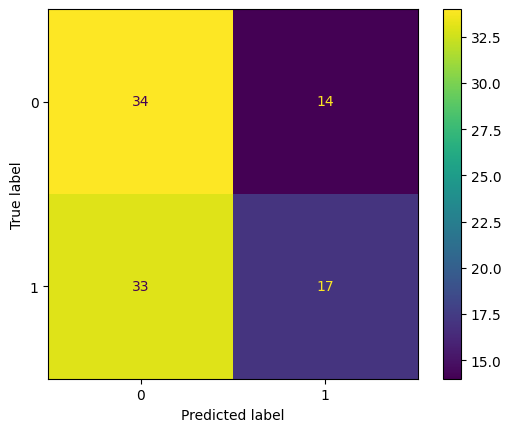

In [4]:
model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_train_pred_bin = model.predict(X_train)
y_test_pred_bin = model.predict(X_test)

df = rsi_pipe.get_test_price(y_test_pred_bin)  # ! Prediction_ExpProf will not be corret as we 
                                               # ! proposed bin not price

start_capital = 100000
tt = market.BinTraderTest(start_capital, y_test_pred_bin, df["Price_True"])
bt = market.BinTraderTest(start_capital, y_test, df["Price_True"])
traded_capital = tt.trade()
maximal_caital = bt.trade()
print(f"Model earned {(traded_capital):.2f}$ out of {maximal_caital:.2f}$ starting from {start_capital}$ ")

print(f"Train accuracy {model.score(X_train, y_train):.2f} \nTest accuracy  {model.score(X_test, y_test):.2f}")

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_bin)

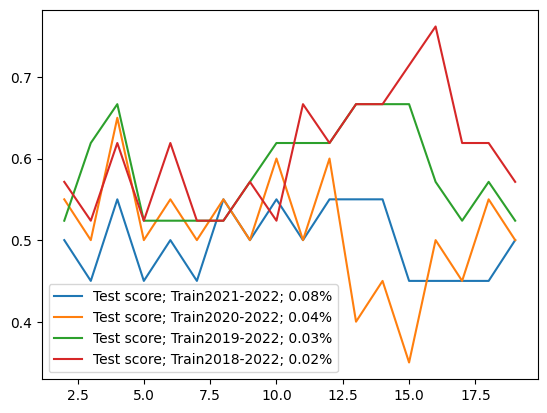

In [5]:
def plot_test_score(year, test_coef):
    neigh_count = [i for i in range(2, 20)]
    X = []
    Y = []
    orig_stdout = sys.stdout
    orig_stderr = sys.stderr
    f = open(os.devnull, 'w')
    sys.stdout = f
    sys.stderr = f
    rsi_pipe = process.RsiBinPipeline(ticker, start=f"{year}-04-25", end="2022-04-25", test_coef=test_coef)
    X_train, y_train, X_test, y_test = rsi_pipe.get_data()
    for n in neigh_count:
        model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
        y_test_pred_bin = model.predict(X_test)
        X.append(n)
        Y.append(model.score(X_test, y_test))
    sys.stdout = orig_stdout
    sys.stderr = orig_stderr
    plt.plot(X, Y, label=f"Test score; Train{year}-2022; {test_coef:.2f}%")
    plt.legend()
    plt.grid()

    
plot_test_score("2021", 1/12)
plot_test_score("2020", 1/12/2)
plot_test_score("2019", 1/12/3)
plot_test_score("2018", 1/12/4)
plt.show()

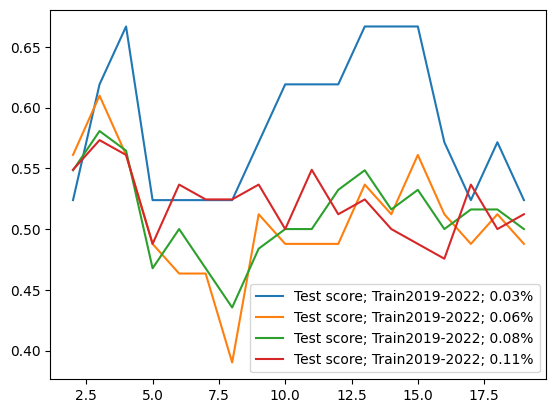

In [6]:
plot_test_score("2019", 1/12/3)
plot_test_score("2019", 2/12/3)
plot_test_score("2019", 3/12/3)
plot_test_score("2019", 4/12/3)
plt.show()

In [44]:
tickers = ["EBAY", "ALGN", "CMCSA"]
byt = market.BinYearTest(tickers, process.RsiBinPipeline, train_period="2y", end_date=None, window_size=15)

In [45]:
model = KNeighborsClassifier(4)
orig_stdout = sys.stdout
orig_stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stdout = f
sys.stderr = f
year_test_df = byt.trade(model)
sys.stdout = orig_stdout
sys.stderr = orig_stderr

In [46]:
pd.options.display.float_format = '{:,.2f}'.format
year_test_df

,Month,TrainAcc,TestAcc,Income,Potential
0,May_2022,0.69,0.56,1.03,0.24
1,Jun_2022,0.69,0.49,1.01,0.10
2,Jul_2022,0.69,0.57,1.06,0.45
3,Aug_2022,0.69,0.46,0.97,-0.32
4,Sep_2022,0.69,0.51,0.96,-0.35
5,Oct_2022,0.69,0.48,1.03,0.25
6,Nov_2022,0.69,0.51,1.01,0.10
7,Dec_2022,0.69,0.54,1.01,0.13
8,Jan_2023,0.69,0.36,1.00,-0.04
9,Feb_2023,0.69,0.54,0.98,-0.30


In [47]:
year_test_df.mean()

C:\Users\valer\AppData\Local\Temp\ipykernel_17712\561746647.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  year_test_df.mean()


TrainAcc    0.69
TestAcc     0.51
Income      1.01
Potential   0.03
dtype: float64

In [48]:
from functools import reduce
items = list(year_test_df["Income"])
reduced_income = reduce(lambda a,b: a*b, items)
print("Year capital multiplier", reduced_income)

Year capital multiplier 1.0864947720037643


### KNeighborsClassifier Pattern search

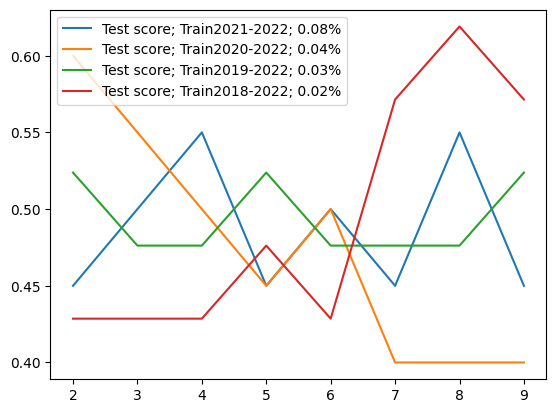

In [14]:
from scipy import stats

def plot_test_score(year, test_coef):
    neigh_count = [i for i in range(2, 10)]
    X = []
    Y = []
    orig_stdout = sys.stdout
    orig_stderr = sys.stderr
    f = open(os.devnull, 'w')
    sys.stdout = f
    sys.stderr = f
    rsi_pipe = process.RsiBinPipeline(ticker, start=f"{year}-04-25", end="2022-04-25", test_coef=test_coef)
    X_train, y_train, X_test, y_test = rsi_pipe.get_data()    
#     metric = lambda x, y: stats.pearsonr(x, y)[0]
    for n in neigh_count:
        model = KNeighborsClassifier(n_neighbors=n, metric='correlation', n_jobs=-1).fit(X_train, y_train)
        y_test_pred_bin = model.predict(X_test)
        X.append(n)
        Y.append(model.score(X_test, y_test))
    sys.stdout = orig_stdout
    sys.stderr = orig_stderr
    plt.plot(X, Y, label=f"Test score; Train{year}-2022; {test_coef:.2f}%")
    plt.legend()
    plt.grid()

    
plot_test_score("2021", 1/12)
plot_test_score("2020", 1/12/2)
plot_test_score("2019", 1/12/3)
plot_test_score("2018", 1/12/4)
plt.show()

In [17]:
tickers = ["EBAY", "ALGN", "CMCSA"]
byt = market.BinYearTest(tickers, process.RsiBinPipeline, train_period="1y", end_date=None, window_size=15)

In [18]:
model = KNeighborsClassifier(4, metric='correlation', n_jobs=-1)
orig_stdout = sys.stdout
orig_stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stdout = f
sys.stderr = f
year_test_df = byt.trade(model)
sys.stdout = orig_stdout
sys.stderr = orig_stderr

In [19]:
pd.options.display.float_format = '{:,.2f}'.format
year_test_df

,Month,TrainAcc,TestAcc,Income,Potential
0,Jun_2022,0.71,0.51,1.00,-0.04
1,Jul_2022,0.70,0.39,0.99,-0.09
2,Aug_2022,0.69,0.54,0.99,-0.13
3,Sep_2022,0.69,0.56,0.94,-0.54
4,Oct_2022,0.68,0.52,1.02,0.16
5,Nov_2022,0.68,0.45,1.06,0.38
6,Dec_2022,0.67,0.44,0.98,-0.20
7,Jan_2023,0.68,0.58,1.08,0.74
8,Feb_2023,0.68,0.50,0.98,-0.32
9,Mar_2023,0.68,0.51,0.98,-0.23


In [25]:
from functools import reduce
items = list(year_test_df["Income"])
reduced_income = reduce(lambda a,b: a*b, items)
"Year capital multiplier " + str(reduced_income)

'Year capital multiplier 1.0543910440758713'

## CatBoostClassifier

In [2]:
from catboost import CatBoostClassifier, Pool

In [13]:
ticker = "CMCSA"
rsi_pipe = process.RsiBinPipeline(ticker, period="3y", test_coef=2/12/3)
X_train, y_train, X_test, y_test = rsi_pipe.get_data()

[*********************100%***********************]  1 of 1 completed


C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["RSI"] = _rsi(dataframe, attribute_name, period)
C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i][attribute_name+"_LnProf"] = lnprofs


In [15]:
model = CatBoostClassifier(
    random_seed=42,
    iterations=20,
    learning_rate=0.01,
    boosting_type='Ordered',  # now faster, Ordered is better
    bootstrap_type='Bernoulli',  # 
    subsample=0.5,               # item2subsample probability
    rsm=1,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    leaf_estimation_method='Newton'
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_True"] = self.true_price_keeper[train_test_id].to_numpy()


Model earned 118442.79$ out of 121359.32$ starting from 100000$ 
Train accuracy 0.70 
Test accuracy  0.59


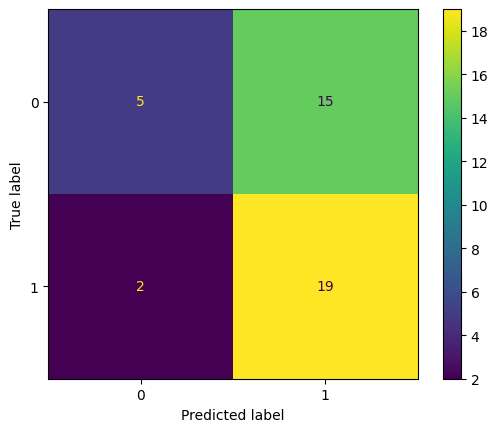

In [16]:
y_train_pred_bin = model.predict(X_train)
y_test_pred_bin = model.predict(X_test)

df = rsi_pipe.get_test_price(y_test_pred_bin)  # ! Prediction_ExpProf will not be corret as we 
                                               # ! proposed bin not price

start_capital = 100000
tt = market.BinTraderTest(start_capital, y_test_pred_bin, df["Price_True"])
bt = market.BinTraderTest(start_capital, y_test, df["Price_True"])
traded_capital = tt.trade()
maximal_caital = bt.trade()
print(f"Model earned {(traded_capital):.2f}$ out of {maximal_caital:.2f}$ starting from {start_capital}$ ")

print(f"Train accuracy {model.score(X_train, y_train):.2f} \nTest accuracy  {model.score(X_test, y_test):.2f}")

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_bin)

In [17]:
tickers = ["EBAY", "ALGN", "CMCSA"]
byt = market.BinYearTest(tickers, process.RsiBinPipeline, train_period="2y", end_date=None, window_size=15)

In [18]:
orig_stdout = sys.stdout
orig_stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stdout = f
sys.stderr = f
year_test_df = byt.trade(model)
sys.stdout = orig_stdout
sys.stderr = orig_stderr

0:	learn: 0.6923748	total: 66.1ms	remaining: 1.25s
1:	learn: 0.6916027	total: 123ms	remaining: 1.1s
2:	learn: 0.6910204	total: 176ms	remaining: 999ms
3:	learn: 0.6906418	total: 233ms	remaining: 930ms
4:	learn: 0.6902829	total: 287ms	remaining: 862ms
5:	learn: 0.6898214	total: 339ms	remaining: 792ms
6:	learn: 0.6892368	total: 396ms	remaining: 736ms
7:	learn: 0.6884512	total: 452ms	remaining: 678ms
8:	learn: 0.6877681	total: 505ms	remaining: 617ms
9:	learn: 0.6871614	total: 554ms	remaining: 554ms
10:	learn: 0.6866621	total: 611ms	remaining: 500ms
11:	learn: 0.6858979	total: 668ms	remaining: 445ms
12:	learn: 0.6853882	total: 720ms	remaining: 388ms
13:	learn: 0.6847819	total: 775ms	remaining: 332ms
14:	learn: 0.6844344	total: 831ms	remaining: 277ms
15:	learn: 0.6836089	total: 886ms	remaining: 222ms
16:	learn: 0.6827651	total: 939ms	remaining: 166ms
17:	learn: 0.6824167	total: 983ms	remaining: 109ms
18:	learn: 0.6818049	total: 1.02s	remaining: 53.7ms
19:	learn: 0.6811602	total: 1.08s	remain

4:	learn: 0.6898130	total: 281ms	remaining: 844ms
5:	learn: 0.6891518	total: 323ms	remaining: 754ms
6:	learn: 0.6884336	total: 378ms	remaining: 701ms
7:	learn: 0.6877283	total: 434ms	remaining: 651ms
8:	learn: 0.6870237	total: 487ms	remaining: 596ms
9:	learn: 0.6863912	total: 542ms	remaining: 542ms
10:	learn: 0.6854297	total: 597ms	remaining: 488ms
11:	learn: 0.6848997	total: 652ms	remaining: 435ms
12:	learn: 0.6840352	total: 707ms	remaining: 381ms
13:	learn: 0.6834400	total: 760ms	remaining: 326ms
14:	learn: 0.6828153	total: 813ms	remaining: 271ms
15:	learn: 0.6818872	total: 868ms	remaining: 217ms
16:	learn: 0.6811150	total: 923ms	remaining: 163ms
17:	learn: 0.6804989	total: 962ms	remaining: 107ms
18:	learn: 0.6800029	total: 999ms	remaining: 52.6ms
19:	learn: 0.6793423	total: 1.05s	remaining: 0us
0:	learn: 0.6927436	total: 62.9ms	remaining: 1.19s
1:	learn: 0.6921471	total: 116ms	remaining: 1.04s
2:	learn: 0.6916937	total: 167ms	remaining: 947ms
3:	learn: 0.6911765	total: 220ms	remaini

9:	learn: 0.6844464	total: 521ms	remaining: 521ms
10:	learn: 0.6836704	total: 573ms	remaining: 469ms
11:	learn: 0.6831779	total: 629ms	remaining: 419ms
12:	learn: 0.6822315	total: 683ms	remaining: 368ms
13:	learn: 0.6816010	total: 736ms	remaining: 315ms
14:	learn: 0.6809080	total: 788ms	remaining: 263ms
15:	learn: 0.6802581	total: 845ms	remaining: 211ms
16:	learn: 0.6795393	total: 899ms	remaining: 159ms
17:	learn: 0.6784465	total: 952ms	remaining: 106ms
18:	learn: 0.6774147	total: 1s	remaining: 52.8ms
19:	learn: 0.6763303	total: 1.06s	remaining: 0us
0:	learn: 0.6922085	total: 67.2ms	remaining: 1.28s
1:	learn: 0.6914469	total: 124ms	remaining: 1.12s
2:	learn: 0.6908676	total: 180ms	remaining: 1.02s
3:	learn: 0.6902691	total: 236ms	remaining: 946ms
4:	learn: 0.6897758	total: 290ms	remaining: 870ms
5:	learn: 0.6894954	total: 343ms	remaining: 800ms
6:	learn: 0.6887991	total: 400ms	remaining: 743ms
7:	learn: 0.6882126	total: 453ms	remaining: 679ms
8:	learn: 0.6875573	total: 503ms	remaining:

12:	learn: 0.6854173	total: 711ms	remaining: 383ms
13:	learn: 0.6848133	total: 758ms	remaining: 325ms
14:	learn: 0.6840649	total: 814ms	remaining: 271ms
15:	learn: 0.6835857	total: 867ms	remaining: 217ms
16:	learn: 0.6829526	total: 919ms	remaining: 162ms
17:	learn: 0.6823862	total: 970ms	remaining: 108ms
18:	learn: 0.6819120	total: 1.01s	remaining: 53.2ms
19:	learn: 0.6815047	total: 1.06s	remaining: 0us
0:	learn: 0.6924143	total: 67.8ms	remaining: 1.29s
1:	learn: 0.6916468	total: 123ms	remaining: 1.11s
2:	learn: 0.6908238	total: 179ms	remaining: 1.01s
3:	learn: 0.6901887	total: 233ms	remaining: 932ms
4:	learn: 0.6895811	total: 289ms	remaining: 866ms
5:	learn: 0.6889482	total: 345ms	remaining: 805ms
6:	learn: 0.6883683	total: 381ms	remaining: 708ms
7:	learn: 0.6877600	total: 416ms	remaining: 624ms
8:	learn: 0.6872778	total: 472ms	remaining: 576ms
9:	learn: 0.6862799	total: 527ms	remaining: 527ms
10:	learn: 0.6848194	total: 578ms	remaining: 473ms
11:	learn: 0.6838713	total: 635ms	remaini

15:	learn: 0.6839677	total: 761ms	remaining: 190ms
16:	learn: 0.6834341	total: 804ms	remaining: 142ms
17:	learn: 0.6824042	total: 853ms	remaining: 94.8ms
18:	learn: 0.6813923	total: 898ms	remaining: 47.3ms
19:	learn: 0.6808085	total: 943ms	remaining: 0us
0:	learn: 0.6927350	total: 66.3ms	remaining: 1.26s
1:	learn: 0.6920777	total: 123ms	remaining: 1.11s
2:	learn: 0.6914854	total: 178ms	remaining: 1.01s
3:	learn: 0.6907077	total: 233ms	remaining: 931ms
4:	learn: 0.6898618	total: 285ms	remaining: 856ms
5:	learn: 0.6890366	total: 340ms	remaining: 794ms
6:	learn: 0.6885366	total: 395ms	remaining: 733ms
7:	learn: 0.6882269	total: 450ms	remaining: 675ms
8:	learn: 0.6877173	total: 502ms	remaining: 614ms
9:	learn: 0.6870870	total: 553ms	remaining: 553ms
10:	learn: 0.6868959	total: 608ms	remaining: 498ms
11:	learn: 0.6865832	total: 663ms	remaining: 442ms
12:	learn: 0.6861351	total: 716ms	remaining: 386ms
13:	learn: 0.6856326	total: 769ms	remaining: 330ms
14:	learn: 0.6851150	total: 825ms	remain

In [19]:
year_test_df

,Month,TrainAcc,TestAcc,Income,Potential
0,May_2022,0.763747,0.458333,0.993503,-0.050176
1,Jun_2022,0.772109,0.509804,0.975809,-0.221936
2,Jul_2022,0.801361,0.647059,1.088049,0.632134
3,Aug_2022,0.796864,0.481481,0.964227,-0.406780
4,Sep_2022,0.800273,0.368421,0.916354,-0.779884
5,Oct_2022,0.797959,0.425926,0.966289,-0.302614
6,Nov_2022,0.778459,0.549020,1.020169,0.136018
7,Dec_2022,0.772789,0.537037,1.004358,0.040890
8,Jan_2023,0.768707,0.355556,1.015767,0.142722
9,Feb_2023,0.785714,0.604167,0.981277,-0.340436


In [20]:
from functools import reduce
items = list(year_test_df["Income"])
reduced_income = reduce(lambda a,b: a*b, items)
print("Year capital multiplier", reduced_income)

Year capital multiplier 0.9075257955521892
